In [ ]:
"""
Purpose: To Run the proofreading of neurons in the 
test set and measure the precision and recall of the new rules

Segments to look out for that had no axon
864691135012395766 # one of the split segments files not there (split index = 1)
864691135865584005 #soma soma merger
864691136451113215 #it was an inhibitory neuron (part of split)

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-07-06 21:48:06,179 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-07-06 21:48:06,180 - settings - Setting database.user to celiib
INFO - 2021-07-06 21:48:06,181 - settings - Setting database.password to newceliipass
INFO - 2021-07-06 21:48:06,181 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-07-06 21:48:06,182 - settings - Setting database.user to celiib
INFO - 2021-07-06 21:48:06,182 - settings - Setting database.password to newceliipass
INFO - 2021-07-06 21:48:06,218 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/de

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-07-06 21:48:07,623 - settings - Setting enable_python_native_blobs to True
INFO - 2021-07-06 21:48:07,814 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-07-06 21:48:07,815 - settings - Setting database.user to celiib
INFO - 2021-07-06 21:48:07,816 - settings - Setting database.password to newceliipass
INFO - 2021-07-06 21:48:07,831 - settings - Setting enable_python_native_blobs to True
INFO - 2021-07-06 21:48:09,171 - settings - Setting enable_python_native_blobs to True
INFO - 2021-07-06 21:48:09,232 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-07-06 21:48:09,233 - settings - Setting database.user to celiib
INFO - 2021-07-06 21:48:09,233 - settings - Setting database.password to newceliipass
INFO - 2021-07-06 21:48:09,234 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-07-06 21:48:09,234 - settings - Setting database.user to celiib
INFO - 2021-07-06 21:48:09,234 - settings - Setting database.pa

In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-07-06 21:48:10,467 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-07-06 21:48:10,468 - settings - Setting database.user to celiib
INFO - 2021-07-06 21:48:10,469 - settings - Setting database.password to newceliipass
INFO - 2021-07-06 21:48:10,475 - settings - Setting enable_python_native_blobs to True
INFO - 2021-07-06 21:48:11,868 - settings - Setting enable_python_native_blobs to True


In [4]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Runnig the validation

In [5]:
"""
Psueodocode: 
1) Pull down the segment ids of the valid neurons

For each neuron
1) Dwonload the neuron object
2) Run the Proofreading
3) Print out the validation plot
4) Save the validation df

"""

'\nPsueodocode: \n1) Pull down the segment ids of the valid neurons\n\nFor each neuron\n1) Dwonload the neuron object\n2) Run the Proofreading\n3) Print out the validation plot\n4) Save the validation df\n\n'

In [6]:
"""
Pseudocode: 
1) Check if there are multiple somas associated with that segment

"""

'\nPseudocode: \n1) Check if there are multiple somas associated with that segment\n\n'

In [7]:
axon_segs = dj.U("segment_id") & (minnie.DecompositionAxon() 
                      & minnie.AutoProofreadValidationSegment4() - minnie.AutoProofreadValidationSegmentExclude4() )
axon_segs

segment_id segment id unique within each Segmentation


In [8]:
"""
Pseudocode: 
1) Find the coordinates of the nucleus for that new segment
2) Make sure that same number of DecompositionAxon objects as in Decomposition
3) Pick the neuron object that is closest and within a certain range of the nucleus
4) Download the neuron object
5) Run the proofreading
6) Save off the validation df
"""

'\nPseudocode: \n1) Find the coordinates of the nucleus for that new segment\n2) Make sure that same number of DecompositionAxon objects as in Decomposition\n3) Pick the neuron object that is closest and within a certain range of the nucleus\n4) Download the neuron object\n5) Run the proofreading\n6) Save off the validation df\n'

In [9]:
val_table = minnie.AutoProofreadValidationScore6() * minnie.AutoProofreadValidationSegmentMap4()
val_table

ver materialization version,nucleus_id nucleus id,segment_id the segment id in the proofread version,old_ver materialization version,split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,decomposition saved neuron object with high fidelity axon,axon_length axon length of the filtered neuron,validation_df,validation_df_ext,pre_tp,pre_tn,pre_fp,pre_fn,pre_precision,pre_recall,pre_f1,post_tp,post_tn,post_fp,post_fn,post_precision,post_recall,post_f1,run_time the amount of time to run (seconds),old_segment_id the segment id in the proofread version--,finished_dendrite whether axon was finished cleaning,finished_axon whether axon was finished cleaning,extension_type,n_somas,n_soma_mergers,n_glia,large_splits,notes
88.00,554775,864691135593719339,0.08,0,=BLOB=,1299.5584330896902,=BLOB=,=BLOB=,29,73,21,0,0.58,1.0,0.7341772151898733,4430,1,6,1,0.9986474301172227,0.9997743173098623,0.9992105559941356,655.42,864691136108720056,True,True,partial,1,0,0,0,
88.00,610434,864691135658054274,0.08,0,=BLOB=,50.76012414122057,=BLOB=,=BLOB=,0,264,0,0,nan,nan,nan,3869,2,2,1,0.999483337638853,0.9997416020671834,0.9996124531714249,397.8,864691135012541942,True,True,partial,1,0,0,0,


In [ ]:
bad_presyn_table = (minnie.AutoProofreadValidationScore6() & "pre_fp>20")
bad_presyn_table

In [ ]:
bad_presyn_table = (minnie.AutoProofreadValidationScore5() & "pre_fp>100")
bad_postsyn_table_filt =  (bad_postsyn_table * minnie.AutoProofreadValidationSegmentMap4()) & axon_segs.proj(old_segment_id="segment_id")
#bad_postsyn_seg_ids = bad_postsyn_table.fetch("segment_id")
bad_postsyn_table_filt.proj("post_fn")

In [ ]:
bad_postsyn_table = (minnie.AutoProofreadValidationScore5() & "post_fn>200")
bad_postsyn_table_filt =  (bad_postsyn_table * minnie.AutoProofreadValidationSegmentMap4()) & axon_segs.proj(old_segment_id="segment_id")
#bad_postsyn_seg_ids = bad_postsyn_table.fetch("segment_id")
bad_postsyn_table_filt.proj("post_fn")

In [ ]:
import datajoint as dj
dj.config["display.limit"] = 30
bad_presyn_table = (minnie.AutoProofreadValidationScore5() & "pre_fp>10")
bad_presyn_seg_ids = bad_presyn_table.fetch("segment_id")
bad_presyn_table

In [ ]:
# multi_soma_keys = (minnie.AutoProofreadValidationSegmentMap4() & "n_somas>1"
#                       & minnie.DecompositionAxon.proj(old_segment_id="segment_id")
#                   & dict(segment_id = 864691135415710906)).proj().fetch(as_dict=True)
# key = multi_soma_keys[0]
# key

In [10]:
segment_id = 864691135584074360
segment_id = 864691135517422218
segment_id = 864691136951664863
segment_id = 864691135446675028
segment_id = 864691135367058169
segment_id = 864691135117980637
segment_id = 864691135761634358
segment_id = 864691136334080435
segment_id = 864691135593719339
key = dict(segment_id=segment_id)

In [11]:
verbose = True

segment_id = key["segment_id"]
if verbose:
    print(f"\n-- Working on neuron {segment_id}---")

segment_map_dict = (minnie.AutoProofreadValidationSegmentMap4() & dict(segment_id=segment_id)).fetch1()

#1) Find the coordinates of the nucleus for that new segment
nucleus_id = segment_map_dict["nucleus_id"]
nuc_center_coords = du.nuclei_id_to_nucleus_centers(nucleus_id)
if verbose:
    print(f"nuc_center_coords = {nuc_center_coords}")

#2) Make sure that same number of DecompositionCellType objects as in Decomposition
old_segment_id = segment_map_dict["old_segment_id"]
if verbose:
    print(f"old_segment_id = {old_segment_id}")

search_key = dict(segment_id=old_segment_id)
n_somas = len(minnie.BaylorSegmentCentroid() & search_key)
n_decomp_axon = len(minnie.DecompositionCellType() & search_key)
if verbose:
    print(f"# of somas = {n_somas} and # of DecompositionCellType = {n_decomp_axon}")


if n_somas != n_decomp_axon:
    raise Exception(f"# of somas = {n_somas} NOT MATCH # of DecompositionCellType = {n_decomp_axon}")

#3) Pick the neuron object that is closest and within a certain range of the nucleus
neuron_objs,split_idxs = du.decomposition_with_spine_recalculation(old_segment_id)
if n_somas > 1:
    """
    Finding the closest soma:
    1) For each neuron object get the mesh center of the soma object
    2) Find the distance of each from the nucleus center
    3) Find the arg min distance and make sure within threshold
    4) Mark the current neuron and the current split index
    """
    nuclei_distance_threshold = 15000

    soma_center_coords = [k["S0"].mesh_center for k in neuron_objs]
    soma_distances = [np.linalg.norm(k-nuc_center_coords) for k in soma_center_coords]
    min_dist_arg = np.argmin(soma_distances)
    min_dist = soma_distances[min_dist_arg]

    if verbose:
        print(f"soma_distances = {soma_distances}")
        print(f"min_dist_arg = {min_dist_arg}, with min distance = {min_dist}")

    if min_dist > nuclei_distance_threshold:
        raise Exception(f"min_dist ({min_dist}) larger than nuclei_distance_threshold ({nuclei_distance_threshold})")

    neuron_obj = neuron_objs[min_dist_arg]
    split_index = split_idxs[min_dist_arg]

    if verbose:
        print(f"Winning split_index = {split_index}")
else:
    split_index = split_idxs[0]
    neuron_obj = neuron_objs[0]
    


-- Working on neuron 864691135593719339---
nuc_center_coords = [1266240  510144  806280]
old_segment_id = 864691136108720056
# of somas = 1 and # of DecompositionCellType = 1
**Using table __decomposition_cell_type for table_to_neuron_objs**
Decompressing Neuron in minimal output mode...please wait
Number of Neurons found = 1


In [34]:
(filt_neuron,
             return_synapse_df_revised,
             return_synapse_df_errors,
            return_validation_df_revised,
            return_validation_df_extension) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                                #filter_list = pru.v6_exc_filters(),
                                filter_list = [pru.exc_high_degree_branching_filter_v6],
                                plot_limb_branch_filter_with_disconnect_effect = False,
                                verbose = True,
                                plot_score=False,
                                nucleus_id = nucleus_id,
                                return_synapse_df_errors=True,
                                return_validation_df_extension = True,                                        
                                split_index=split_index)


--- Working on filter 0:
function = high_degree_branching
function __name__ = filter_away_high_degree_branching
function arguments = {}


Recieved another instance of Neuron class in init -- so just copying data
limb_branch_dict_to_cancel = {'L3': array([34, 65, 25, 48, 49, 79, 80, 81])}
Recieved another instance of Neuron class in init -- so just copying data



 ---- Total time for applying filter: 84.27893447875977 -----

--- Finished Part 1: Filtering Neuron -----

---Step 1: Computing synapse_dict---
# of beginning_direct_connections = 4561 
# of presyn: 123
# of postsyn: 4438

---Step 2: Computing mesh_label_dict---
-- Working on presyn--
Using original_mesh_method
# of distance_errored_syn_idx = 0
# of mesh_errored_syn_idx = 53
# of valid_syn_idx = 70
-- Working on postsyn--
Using original_mesh_method
# of distance_errored_syn_idx = 0
# of mesh_errored_syn_idx = 3
# of valid_syn_idx = 4435

---Step 4: add_error_synapses_to_neuron_obj---
Working on error_type = distance_errored


Segment Id = 864691136108720056
Postsyn counts:
TP:4430
TN:2
FP:5
FN:1
Presyn counts:
TP:29
TN:82
FP:12
FN:0


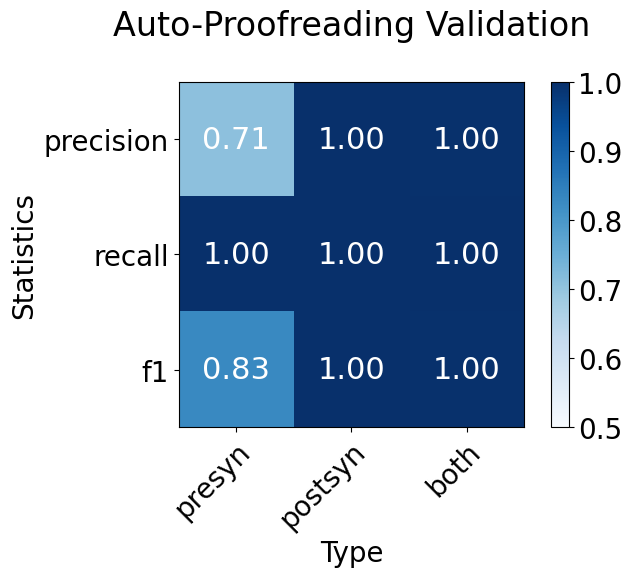

In [35]:
vu.synapse_validation_df_to_score_plot(return_validation_df_revised)

In [36]:
# nviz.plot_axon(filt_neuron)

In [37]:
# import neuron_visualizations as nviz
# nviz.visualize_neuron(filt_neuron,
#                       limb_branch_dict="all")

In [38]:
vu.plot_validation_synapses(filt_neuron.segment_id,
                            validation_df = return_validation_df_revised,
                             synapse_dict = None,
                             synapses_type_to_plot = None,
                             synapses_type_to_not_plot = None,
                             verbose=False,
                             synapse_type = "presyn",
                             TP_color="yellow",
                            TN_color="aqua",
                            FP_color="black",
                            FN_color="orange",
                             synapse_scatter_size = 0.15,
                             
                             #for plotting the actual mesh parts to go along
                             
                             neuron_obj = filt_neuron,
                             plot_only_axon_skeleton = True,
                             error_mesh_color = "red",
                             valid_mesh_color = "green",
                             valid_skeleton_color = "black",
                             mesh_alpha = 0.3,)

Using the mesh from the neuron object


TP:yellow
TN:aqua
FP:black
FN:orange


limb_name = L3
Recieved another instance of Neuron class in init -- so just copying data

 Working on visualization type: mesh

 Working on visualization type: skeleton
No Synapses to plot


No limb name was given so using L3 because was the limb in the first key


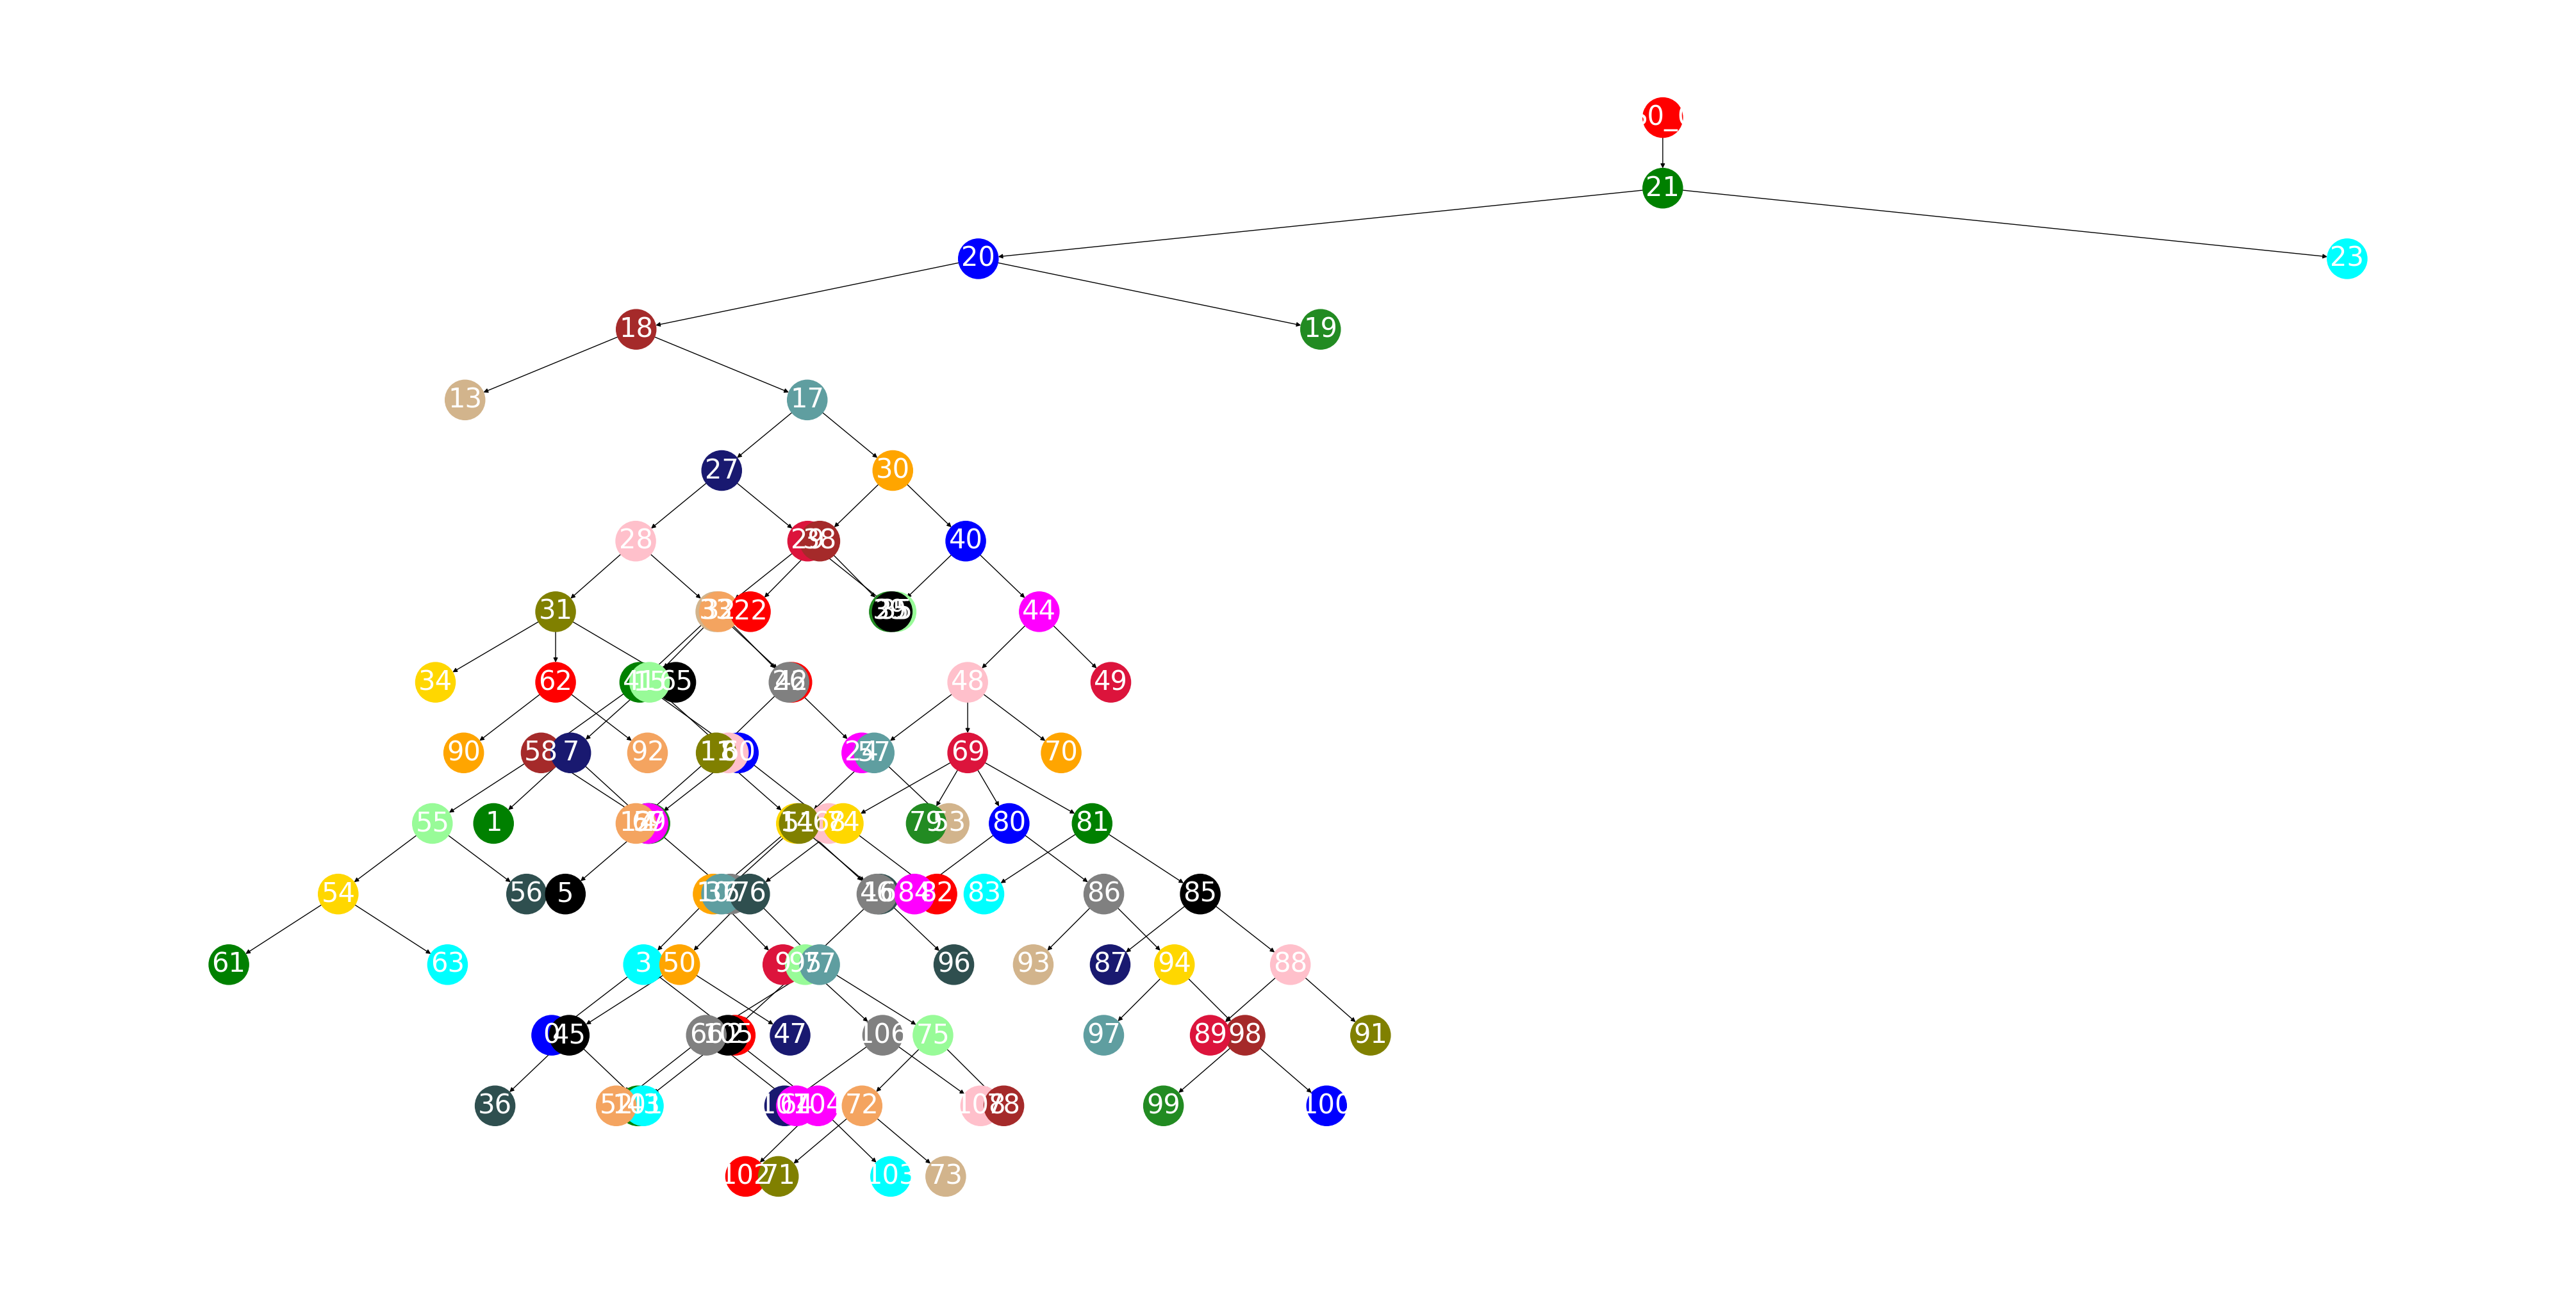

In [18]:
nviz.visualize_neuron_specific_limb(neuron_obj,
                                   "axon")

# debugging the high degree crossover

In [22]:
import axon_utils as au
axon_spines_limb_branch_dict = au.axon_spines_limb_branch_dict(neuron_obj)
short_thick_endnodes_to_remove_limb_branch = au.short_thick_branches_limb_branch_dict(neuron_obj,
                                                                                         verbose = False)
limb_branch_dict = neuron_obj.axon_limb_branch_dict

In [23]:
branches_to_inspect = [40]



 ----- Working on limb L3-------


 ----- Working on branch 40/109: 40--------
downstream_branches = [48 25 49]
skipped_nodes = [44]
Total number of short_thick_endnodes_to_remove = 22
downstream_branches after remove_short_thick_endnodes = [25 48 49]
Total number of axon_spines = 16
downstream_branches after remove_short_thick_endnodes = [25 48 49]
widths_in_branches = [64.77125665 70.14831814 56.20480245 44.95109249]
***Branch being considered after filters = 40***
Group blue: [25]
Group green: [48]
Group red: [49]
Group cyan: [40]


branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Performing Edge Query
After edge filter, # of rows = 3

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  25  48     41.10    5.377061               0.083016              0.000064   
1  25  49     29.01    8.566454               0.132257              0.000133   
2  25  40    119.52   19.820164               0.440927              0.000133   
3  48  49    115.50   13.943516               0.198772              0.000069   
4  48  40     25.82   25.197226               0.560548              0.000069   
5  49  40     87.76   11.253710               0.250355              0.000000   

   n_synapses_diff  
0                2  
1                3  
2                3  
3                1  
4                1  
5                0  
Afer Local query: 
    u   v  sk_angle  width_diff

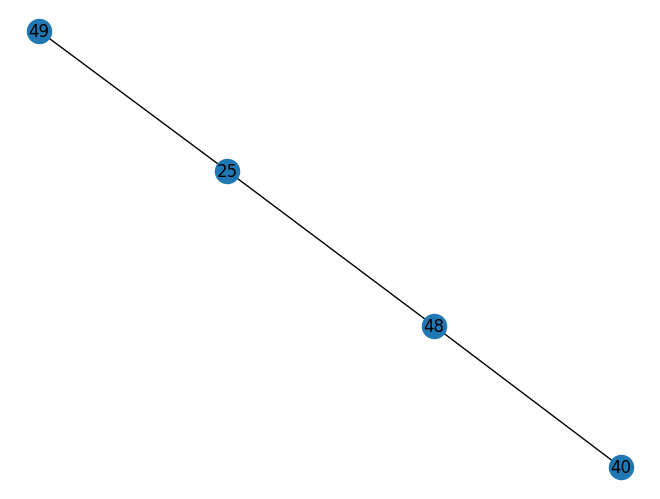

Performing global features query
Performing Edge Query
After edge filter, # of rows = 3

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  25  48     41.10    5.377061               0.083016              0.000064   
1  25  49     29.01    8.566454               0.132257              0.000133   
2  48  40     25.82   25.197226               0.560548              0.000069   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                2                       None                          None  
1                3                       None                          None  
2                1                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  25  48     41.10    5.377061               0.083016              0.000064   
1  25  49     29.01    8.566454               0.132257              0.

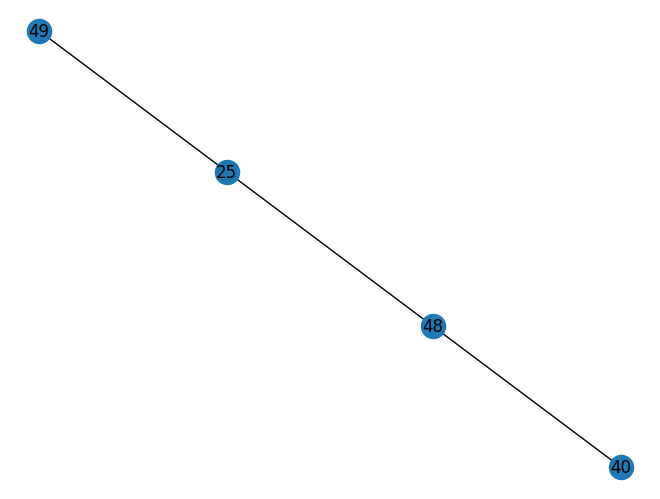

Performing node features query
Performing Edge Query
After edge filter, # of rows = 3

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  25  48     41.10    5.377061               0.083016              0.000064   
1  25  49     29.01    8.566454               0.132257              0.000133   
2  48  40     25.82   25.197226               0.560548              0.000069   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                2                       None                          None   
1                3                       None                          None   
2                1                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
2                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  25  48     41.10    5.377061            

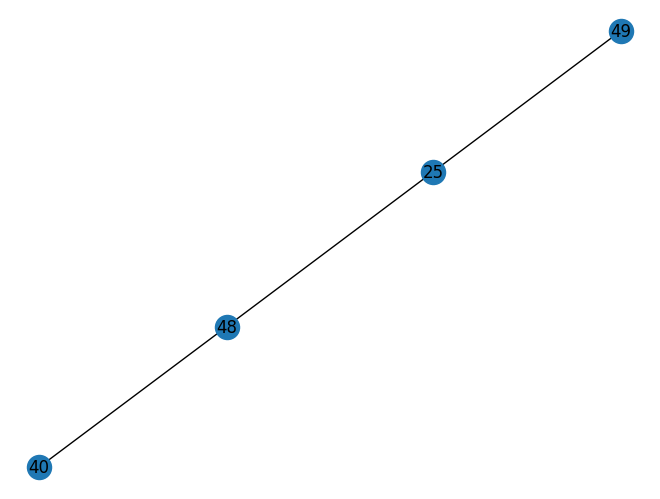

for upstream node 40, winning_node = None, error_branches = [25 48 49]
winning_downstream = None,error_downstream = [25 48 49] 


In [33]:
import error_detection as ed
min_upstream_skeletal_distance = 500
kwargs = dict(plot_G_local_edge=True,
             plot_G_global_edge=True,
             plot_G_node_edge=True,
             plot_starting_branches=True)
skip_distance = None
for limb_name,branch_list in limb_branch_dict.items():
    if verbose:
        print(f"\n\n ----- Working on limb {limb_name}-------")
    limb_obj = neuron_obj[limb_name]
#         short_thick_endnodes_to_remove = au.short_thick_branches_from_limb(limb_obj,
#                                      verbose = False)

    if limb_name in short_thick_endnodes_to_remove_limb_branch.keys():
        #short_thick_endnodes_to_remove = short_thick_endnodes_to_remove_limb_branch[limb_name]
        limb_obj.short_thick_endnodes = short_thick_endnodes_to_remove_limb_branch[limb_name]
    else:
        limb_obj.short_thick_endnodes = []


    if limb_name in axon_spines_limb_branch_dict.keys():
        limb_obj.axon_spines = axon_spines_limb_branch_dict[limb_name]
    else:
        limb_obj.axon_spines = []

    error_branches = []
    for j,b in enumerate(branch_list):
        if b not in branches_to_inspect:
            continue
        if verbose:
            print(f"\n\n ----- Working on branch {j}/{len(branch_list)}: {b}--------")
        winning_downstream,error_downstream = ed.high_degree_upstream_match(limb_obj,
                                                                            branch_idx=b,
                                                                            skip_distance=skip_distance,
                            short_thick_endnodes_to_remove = limb_obj.short_thick_endnodes,
                                                                            verbose = True,
                                                                            axon_spines = limb_obj.axon_spines,
                                                                            min_upstream_skeletal_distance=min_upstream_skeletal_distance,
                                                                           **kwargs)

        #winning_downstream,error_downstream = [],[]

        if verbose:
            print(f"winning_downstream = {winning_downstream},error_downstream = {error_downstream} ")
        if len(error_downstream) > 0:
            error_branches += list(error_downstream)

# Measuring the Downstream Synaptic Density

In [ ]:
filt_neuron.axon_limb_name

In [ ]:
nviz.visualize_neuron_specific_limb(filt_neuron,1)

In [ ]:
nru.downstream_nodes(filt_neuron[1],31)

In [ ]:
filt_neuron[1][43].synapse_density_pre

In [ ]:
au.axon_width(filt_neuron[1][12])

In [ ]:
import axon_utils as au
curr_branch = filt_neuron[1][47]
curr_web = curr_branch.web
au.valid_web_for_t(curr_web,
                                   size_threshold = 120,
                                   size_type = "ray_trace_median",
                                   above_threshold = True,
                                       verbose=True)

In [ ]:
nviz.plot_objects(curr_branch.mesh,
                 meshes = [curr_web],
                 meshes_colors="red")

In [ ]:
limb_obj = filt_neuron[2]
nru.upstream_node(limb_obj,57)

In [ ]:
branch_obj = limb_obj[58]
branch_obj.synapse_density_pre

In [ ]:
branch_obj = limb_obj[57]
print(branch_obj.synapse_density_pre*1000,branch_obj.n_synapses_pre)

branch_obj = limb_obj[64]
print(branch_obj.synapse_density_pre*1000,branch_obj.n_synapses_pre)

In [ ]:
branch_obj = limb_obj[68]
print(branch_obj.synapse_density_pre*1000,branch_obj.n_synapses_pre)

branch_obj = limb_obj[69]
print(branch_obj.synapse_density_pre*1000,branch_obj.n_synapses_pre)

In [ ]:
nviz.plot_limb_path(limb_obj,[58,68,69])

In [ ]:
nviz.plot_objects(filt_neuron[2][64].mesh)

In [ ]:
import axon_utils as au

curr_web = curr_branch.web
au.valid_web_for_t(curr_web,
                                   size_threshold = 120,
                                   size_type = "ray_trace_median",
                                   above_threshold = True,
                                       verbose=True)

In [ ]:
curr_branch = filt_neuron[0][4]
nviz.plot_objects(curr_branch.mesh,
                 meshes=[curr_branch.web],
                 meshes_colors="red")

In [ ]:
import error_detection as ed
ed.webbing_t_errors_limb_branch_dict(filt_neuron,
                                    plot_two_downstream_thin_axon_limb_branch  = True,
                                    plot_wide_angled_children = True,
                                    plot_web_errors=True, 
                                     child_skeletal_threshold = 2000,
                                    verbose = True)

In [ ]:
nviz.visualize_neuron_specific_limb(filt_neuron,0)

# Debug 2: Looking at thick T errors

In [ ]:
nru.downstream_nodes(neuron_obj[1],15)

In [ ]:
ed.skip_distance_from_branch_width(neuron_obj[1][15].width)

In [ ]:
neuron_obj[1][20].skeletal_length

In [ ]:
nviz.plot_limb_branch_dict(neuron_obj,dict(L1=[15]))

In [ ]:
au.axon_width(filt_neuron[1][13]),au.axon_width(filt_neuron[1][14])

In [ ]:
import error_detection as ed
ed.thick_t_errors_limb_branch_dict(neuron_obj,
        axon_only = True,
        parent_width_maximum = 70,
        min_child_width_max = 80,
        child_skeletal_threshold = 7000,
        plot_two_downstream_thin_axon_limb_branch = False,
        plot_wide_angled_children = True,
        plot_thick_t_crossing_limb_branch = True,
        plot_t_error_limb_branch = True,
        verbose = True)

# Debug 1: Looking through all of the high degree branching points

In [ ]:
ed.high_degree_branch_errors_limb_branch_dict(neuron_obj,
                                              plot_limb_branch_errors=True,
                                             high_degree_order_verbose=False)

In [ ]:
"""
Pseudocode: 
1) Get the branch names of all those considered for the high degree branching points

"""
(filt_neuron,
             return_synapse_df_revised,
             return_synapse_df_errors,
            return_validation_df_revised,
            return_validation_df_extension) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                                #filter_list = pru.v6_exc_filters(),
                                filter_list = [pru.exc_high_degree_branching_filter_v6],
                                plot_limb_branch_filter_with_disconnect_effect = False,
                                verbose = True,
                                plot_score=False,
                                nucleus_id = nucleus_id,
                                return_synapse_df_errors=True,
                                return_validation_df_extension = True,                                        
                                split_index=split_index)

In [ ]:
nviz.visualize_neuron_specific_limb(filt_neuron,
                                   2)

In [ ]:
nru.upstream_node(limb_obj,24)

In [ ]:
import axon_utils as au
au.axon_width(limb_obj[25])

In [ ]:
limb_obj = filt_neuron[2]
nviz.plot_objects(limb_obj[25].mesh)

In [ ]:
(filt_neuron_2,
             return_synapse_df_revised,
             return_synapse_df_errors,
            return_validation_df_revised,
            return_validation_df_extension) =  vu.filtered_neuron_score(neuron_obj = filt_neuron,   
                                #filter_list = pru.v6_exc_filters(),
                                filter_list = [pru.exc_high_degree_branching_filter_v6],
                                plot_limb_branch_filter_with_disconnect_effect = False,
                                verbose = True,
                                plot_score=False,
                                nucleus_id = nucleus_id,
                                return_synapse_df_errors=True,
                                return_validation_df_extension = True,                                        
                                split_index=split_index)

In [ ]:
nru.downstream_nodes(filt_neuron[1],9)

In [ ]:
limb_obj = filt_neuron[1]
nviz.plot_limb_path(limb_obj,[9,8,7])

In [ ]:
[au.axon_width(limb_obj[k]) for k in [9,8,7]]

In [ ]:
limb_obj[7].skeletal_length

In [ ]:
nviz.plot_objects(filt_neuron[1][43].mesh)

In [ ]:
#branches_to_check = [50,102,121,136,147,152,163,173,224,227,260]
branches_to_check = [53,185,177,154,138,124,115,108,92,14]

In [ ]:
curr_idx = 9

limb_idx = 1
limb_obj = neuron_obj[limb_idx]

curr_branch = branches_to_check[curr_idx] 
nviz.visualize_branch_at_downstream_split(neuron_obj,
                                          limb_idx,
                                          curr_branch,
                                          print_axon_border_info=False,
                                         limb_branch_synapses=True)

In [ ]:
import error_detection as ed


ed.high_degree_upstream_match(limb_obj,
                             branch_idx = curr_branch,
                              plot_starting_branches = True,
                             plot_extracted_skeletons = False,
                             plot_G_local_edge = True,
                              plot_G_global_edge = True,
                              plot_G_node_edge = True,
                              plot_G_exclusive_partner_edge = True,
                              plot_final_branch_matches = True
                             )